In [1]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
df.duplicated().sum()

0

In [35]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<ipython-input-37-880f20a4864a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Profit', y='State', inner='stick', palette='Dark2')


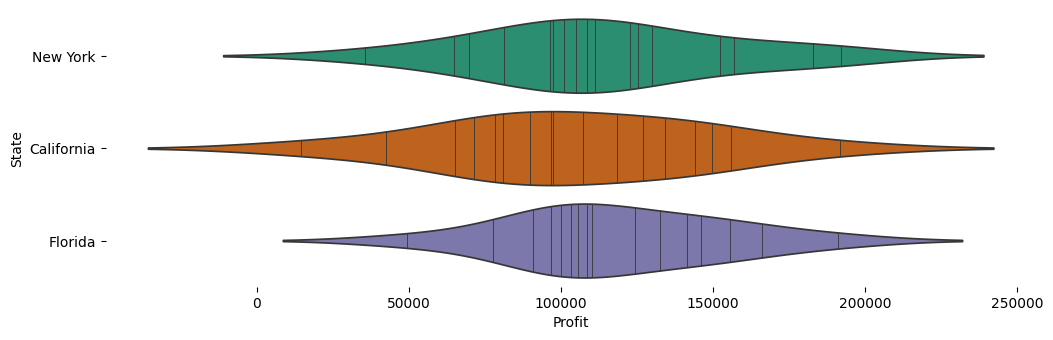

In [37]:
# @title State vs Profit

figsize = (12, 1.2 * len(df['State'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Profit', y='State', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

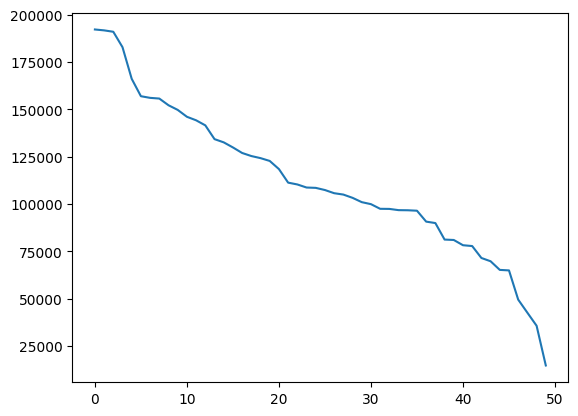

In [38]:
df['Profit'].plot()
plt.show()

<ipython-input-39-49ab68d386fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State',y='Profit',data=df,palette='rainbow')


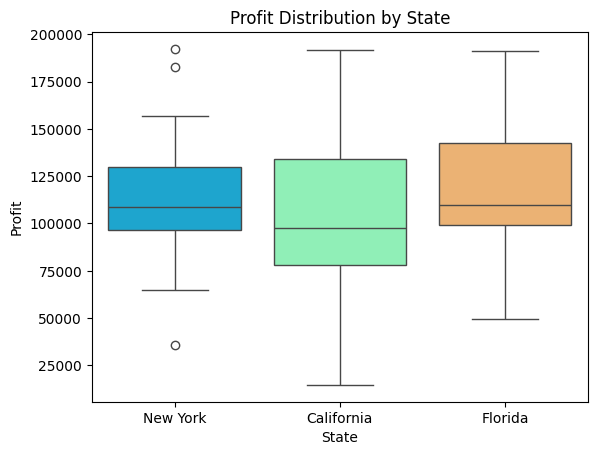

In [39]:
sns.boxplot(x='State',y='Profit',data=df,palette='rainbow')
plt.title('Profit Distribution by State')
plt.show()

<ipython-input-40-460f12d22d34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'],kde=True)


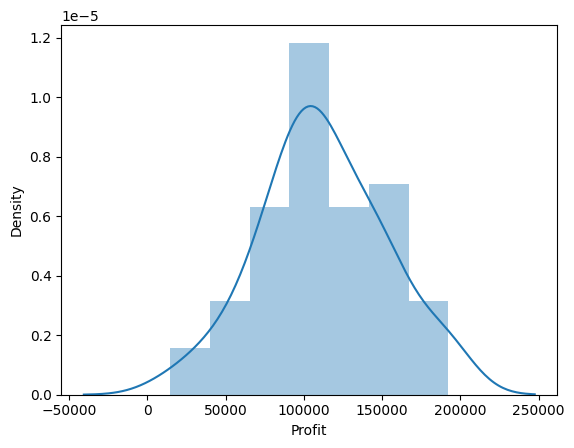

In [40]:
sns.distplot(df['Profit'],kde=True)
plt.show()

<Axes: >

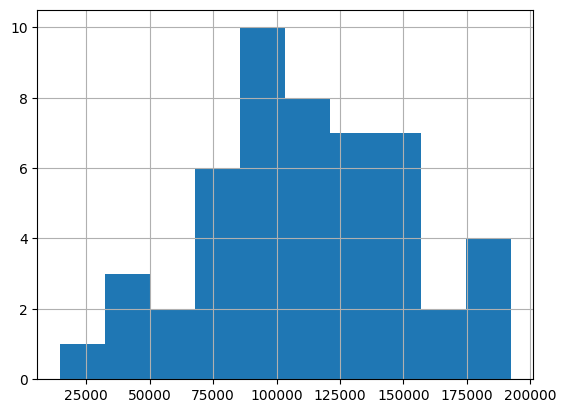

In [41]:
df['Profit'].hist()

<ipython-input-42-82dc61d73b85>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State',y='Profit',data=df,palette='husl',errorbar=None)


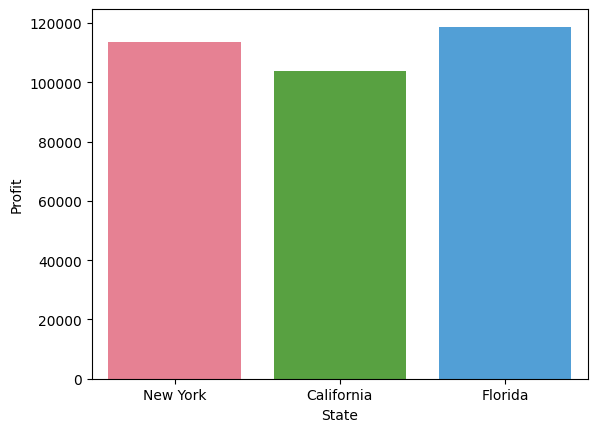

In [42]:
sns.barplot(x='State',y='Profit',data=df,palette='husl',errorbar=None)
plt.show()

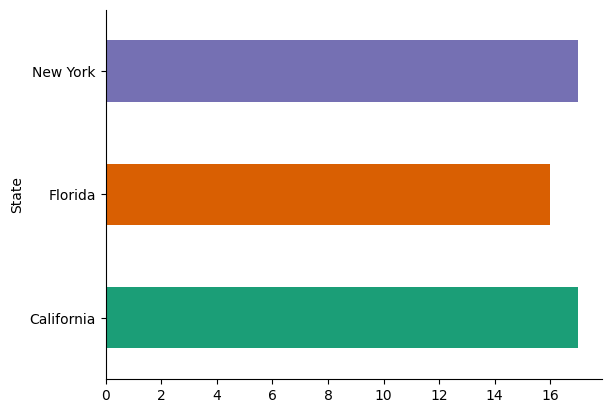

In [43]:
# @title State

df.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

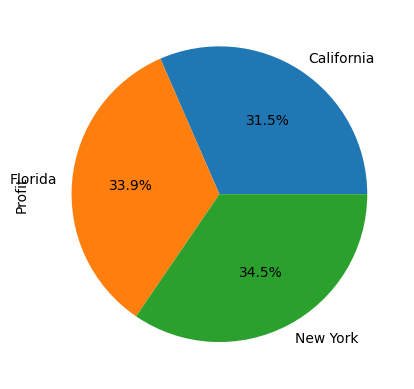

In [44]:
df.groupby('State')['Profit'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [45]:
# Calculate the average profit for each state
df.groupby('State')['Profit'].mean()


State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

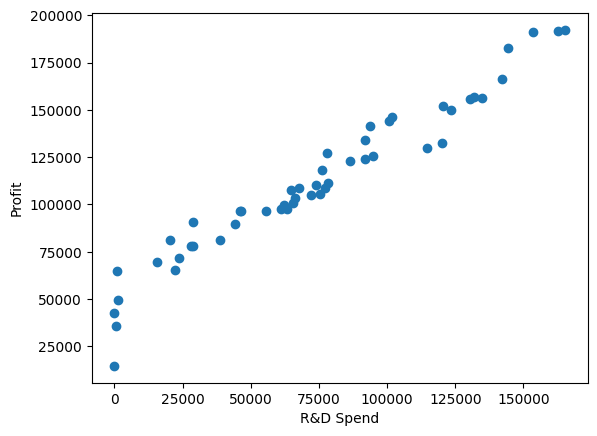

In [46]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

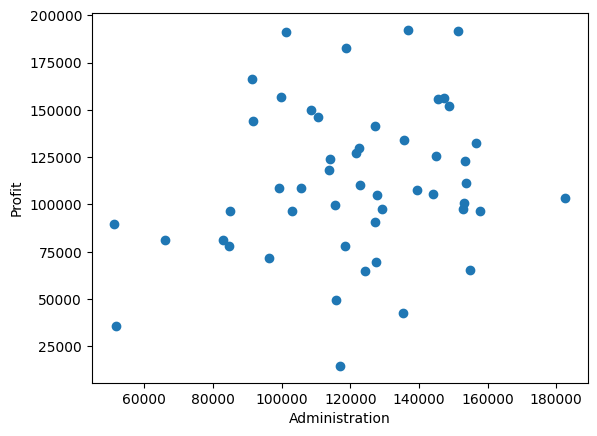

In [47]:
plt.scatter(df['Administration'],df['Profit'])
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

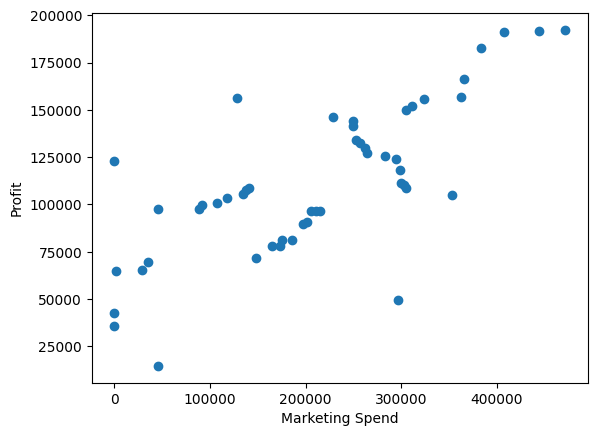

In [48]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [61]:
X = df[['R&D Spend','Administration','Marketing Spend']]
Y = df['Profit']


In [62]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_x = ss.fit_transform(X)
ss_x = pd.DataFrame(ss_x)
list(X)
ss_x.columns = list(X)
ss_x

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [63]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_x = ss.fit_transform(X)
mm_x = pd.DataFrame(ss_x)
list(X)
mm_x.columns = list(X)
mm_x.head()


,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528


In [64]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['State']=LE.fit_transform(df['State'])


In [65]:
#============Multi Linear Regression using standardization==================

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(ss_x, Y)
ss_Y_pred = LR.predict(ss_x)
ss_Y_pred

from sklearn.metrics import r2_score
print("\n\t**Multi Linear Regression using min-max scalar r^2score**")
print("R^square", r2_score(Y,ss_Y_pred).round(2))



	**Multi Linear Regression using min-max scalar r^2score**
R^square 0.95


In [66]:
#============Multi Linear Regression using min-max scalar==================
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(mm_x,Y)
mm_Y_pred=LR.predict(mm_x)


#Metrics
from sklearn.metrics import r2_score
print("\n\t**Multi Linear Regression using min-max scalar r^2score**")
print("R^square", r2_score(Y,mm_Y_pred).round(2))



	**Multi Linear Regression using min-max scalar r^2score**
R^square 0.95
